In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# a artificial
a_values = pd.read_csv('../../input_data/a/a_values.csv', sep=';', header=None)
#a_rep_gui = pd.read_csv('output/discr_hat_transformer_10_missing_TRANSPOSED.csv', sep=';', header=0)

# b artificial
b_values = pd.read_csv('../../input_data/b/b_values.csv', sep=';', header=None)
#b_rep_gui = pd.read_csv('output/diff_transformer_10_missing.csv', sep=';', header=0)

# theta artificial
theta_values = pd.read_csv('../../input_data/theta/theta_values.csv', sep=';', header=None)
#theta_rep_gui = pd.read_csv('output/thetas_transformer_10_missing.csv', sep=';', header=0)

## Discriminations

In [3]:
a_results = pd.DataFrame(columns=['a_values'])

a_results['a_values'] = a_values

cols = ['Rep' + str(i+1) for i in range(100)]

for i in range(100):
    rep = np.genfromtxt('a/discr_hat_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';').transpose().flatten()
    rep = rep[rep != 0]

    a_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/3832346673.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  a_results['Rep' + str(i+1)] = rep


In [4]:
a_results['Bias'] = np.sum(a_values.values - a_results[cols].values, axis=1)/100
a_results['RMSE'] = np.sqrt(np.sum((a_values.values - a_results[cols])**2, axis=1)/100)
a_results['Abs Bias'] = np.sum(np.abs(a_values.values - a_results[cols].values), axis=1)/100

In [5]:
corrs = []

for column in cols:
    corrs.append(a_results['a_values'].corr(a_results[column]))

a_results['Corr'] = ""
a_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/2534136238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_results['Corr'][0] = np.mean(corrs, axis=0)


In [6]:
a_results

,a_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,1.164934,1.159807,1.295645,1.144090,1.075247,1.145143,1.177667,1.046292,1.198323,1.191919,...,1.112310,1.210231,1.233916,1.159971,1.203484,1.207094,-0.005805,0.063930,0.050711,0.501626
1,0.761002,0.816789,0.777651,0.817269,0.673694,0.804962,0.754814,0.798591,0.847067,0.769209,...,0.833939,0.817962,0.795328,0.767619,0.768058,0.866116,-0.028167,0.054700,0.044070,
2,0.823079,0.875501,1.153761,0.773901,0.862084,0.984453,0.749260,0.911629,0.936559,0.875151,...,0.829677,0.846733,0.947207,0.873632,1.036296,1.072309,-0.109472,0.150042,0.117986,
3,1.507663,2.018348,27.154580,1.758348,2.540906,6.361491,1.941254,2.601133,2.327321,1.982198,...,1.951683,1.925036,30.166381,2.427414,2.189077,2.064781,-3.290269,8.401297,3.290269,
4,0.733496,0.767095,0.752721,1.000620,1.002875,0.806742,0.839594,0.884183,0.959880,0.893924,...,0.894605,0.924156,0.889042,0.872718,0.898765,1.021531,-0.294304,1.240346,0.294304,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.819945,2.249277,1.783885,1.878024,1.955350,2.296465,1.852379,2.157676,1.990484,2.288363,...,1.706442,1.680996,2.053982,1.946233,1.825026,1.718253,-1.173576,1.194796,1.173576,
296,1.348967,47.763387,48.958403,50.004414,47.762540,51.191223,49.325070,53.114811,49.842131,50.903284,...,49.986843,48.729800,52.618752,52.998998,54.743899,47.784312,-49.995905,50.036736,49.995905,
297,0.774595,2.170274,2.474710,15.001920,2.478209,2.618424,3.115568,2.075062,2.280044,2.121305,...,2.233323,2.914602,2.169746,12.702796,16.123753,14.747248,-4.682414,7.348974,4.682414,
298,1.662084,27.050638,34.084893,30.627931,32.841982,31.358275,38.430915,26.052765,36.394302,28.453325,...,30.132842,34.321189,29.650053,31.422562,34.717962,38.379154,-30.262727,30.407460,30.262727,


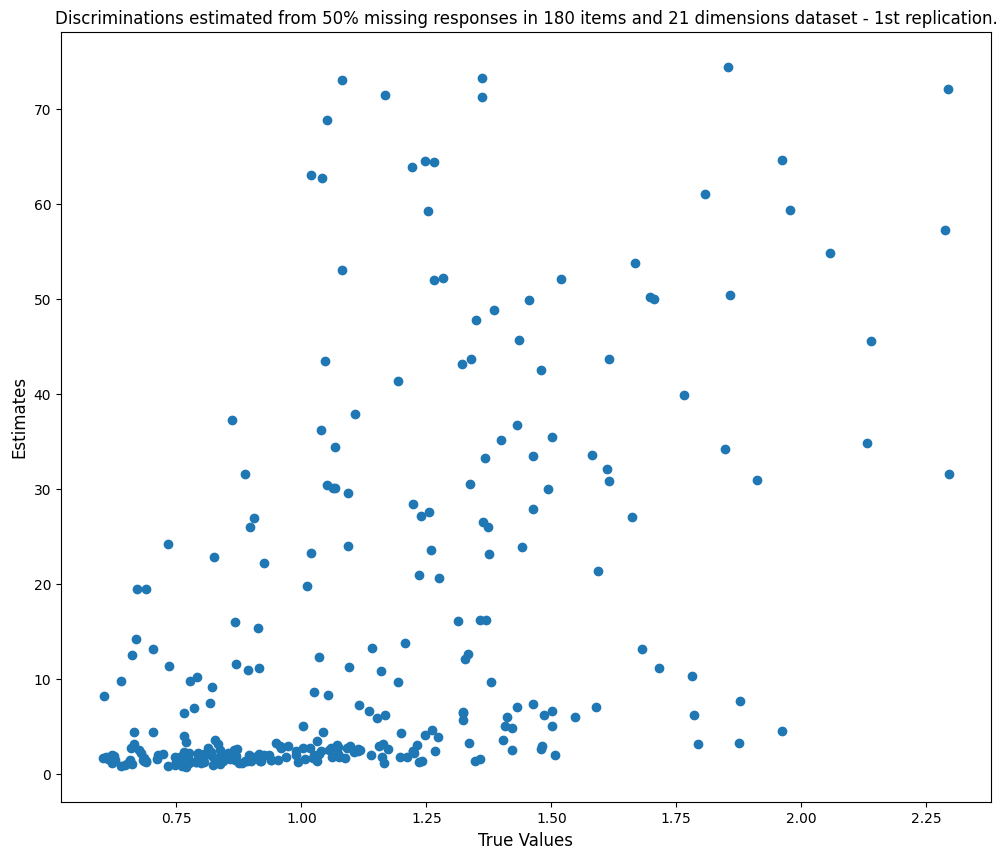

In [7]:
plt.figure(figsize=(12, 10))
plt.scatter(x=a_values.T, y=a_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Discriminations estimated from 50% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [8]:
a_results.to_csv('a/a_results.csv', sep=';', header=True, index=False)

## Difficulties

In [9]:
b_results = pd.DataFrame(columns=['b_values'])

b_results['b_values'] = b_values

for i in range(100):
    rep = np.genfromtxt('b/diff_hat_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';')
    b_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/3174923373.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  b_results['Rep' + str(i+1)] = rep


In [10]:
b_results['Bias'] = np.sum(b_values.values - b_results[cols].values, axis=1)/100
b_results['RMSE'] = np.sqrt(np.sum((b_values.values - b_results[cols])**2, axis=1)/100)
b_results['Abs Bias'] = np.sum(np.abs(b_values.values - b_results[cols].values), axis=1)/100

In [11]:
corrs = []

for column in cols:
    corrs.append(b_results['b_values'].corr(b_results[column]))

b_results['Corr'] = ""
b_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/994335258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_results['Corr'][0] = np.mean(corrs, axis=0)


In [12]:
b_results

,b_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-0.516250,-0.679150,-0.648456,-0.751292,-0.680614,-0.684154,-0.705745,-0.646471,-0.726772,-0.642009,...,-0.639033,-0.703686,-0.727407,-0.701906,-0.678222,-0.673146,0.169652,0.173069,0.169652,0.864515
1,-0.403987,-0.518677,-0.534613,-0.567635,-0.548901,-0.496081,-0.546642,-0.546021,-0.591084,-0.482386,...,-0.539877,-0.513512,-0.503034,-0.527005,-0.496735,-0.498566,0.119366,0.123988,0.119366,
2,-1.797941,-2.549647,-2.169617,-2.865381,-2.461307,-2.430581,-2.260168,-2.299876,-2.381172,-2.320149,...,-2.437101,-2.549658,-2.501557,-2.324540,-2.224014,-2.456808,0.593254,0.613506,0.593254,
3,0.763532,2.452555,3.578369,2.666508,2.299344,2.565995,2.821160,2.495675,2.744672,3.326881,...,2.728974,2.549383,2.519934,2.063045,2.578805,2.688746,-1.871159,1.902414,1.871159,
4,-0.787187,-1.348131,-2.450708,-0.711490,-1.446232,-0.651066,-0.739941,-1.140121,-2.406164,-0.934552,...,-0.926482,-0.938772,-1.877560,-0.985785,-0.869175,-1.582970,0.496083,0.756953,0.524957,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.660764,1.042365,0.872183,1.771866,1.467031,1.077859,1.089316,1.413351,1.464492,0.769729,...,1.136774,1.865622,1.662055,1.895099,1.316109,0.982834,-0.685141,0.777535,0.688718,
176,0.928390,1.502903,2.139106,0.725911,1.906824,1.612972,2.035481,2.282037,1.729927,2.370534,...,1.224533,2.141777,1.963923,0.570395,0.655424,0.487300,-0.804747,1.046325,0.921609,
177,-2.073206,-2.156182,-2.142850,-2.089247,-2.122431,-2.123692,-2.136418,-2.132315,-2.118127,-2.105834,...,-2.100960,-2.101408,-2.145778,-2.141466,-2.118874,-2.169540,0.055317,0.065003,0.056777,
178,0.197686,0.206807,0.236870,0.212814,0.213144,0.241081,0.227013,0.198686,0.187642,0.190434,...,0.195273,0.208837,0.189696,0.214650,0.184287,0.206517,-0.008874,0.020796,0.016588,


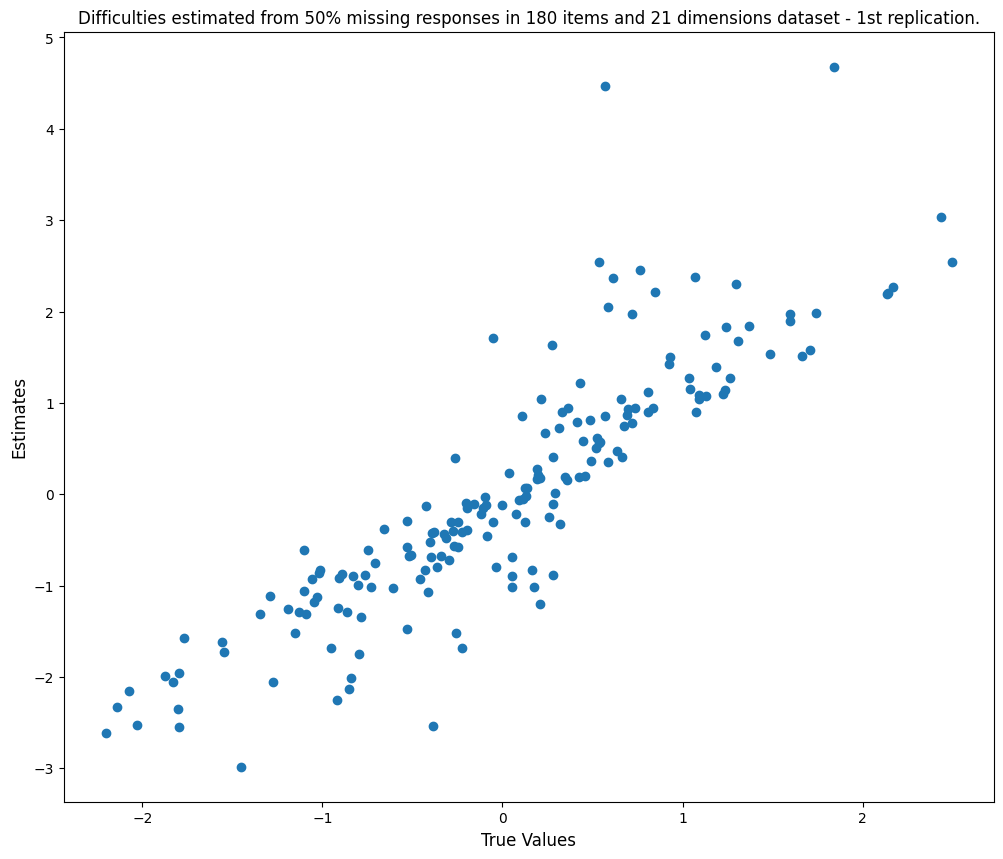

In [13]:
plt.figure(figsize=(12, 10))
plt.scatter(x=b_values.T, y=b_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Difficulties estimated from 50% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [14]:
b_results.to_csv('b/b_results.csv', sep=';', header=True, index=False)

## Thetas

In [15]:
theta_values = theta_values.values.reshape((21, 10000))[:, :8000].flatten()

In [16]:
theta_results = pd.DataFrame(columns=['theta_values'])

theta_results['theta_values'] = theta_values

for i in range(100):
    rep = np.genfromtxt('theta/thetas_rep' + str(i+1) + '_jml_50_missing_2.csv', delimiter=';').transpose().flatten()
    theta_results['Rep' + str(i+1)] = rep

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/3306603789.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  theta_results['Rep' + str(i+1)] = rep


In [17]:
theta_values = theta_values.reshape((theta_values.shape[0], 1))
theta_results['Bias'] = np.sum(theta_values - theta_results[cols].values, axis=1)/100
theta_results['RMSE'] = np.sqrt(np.sum((theta_values - theta_results[cols].values)**2, axis=1)/100)
theta_results['Abs Bias'] = np.sum(np.abs(theta_values - theta_results[cols].values), axis=1)/100

In [18]:
corrs = []

for column in cols:
    corrs.append(theta_results['theta_values'].corr(theta_results[column]))

theta_results['Corr'] = ""
theta_results['Corr'][0] = np.mean(corrs, axis=0)

/var/folders/9z/7hm8srmn2c53mf85yzxqqmk40000gn/T/ipykernel_91018/604505848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theta_results['Corr'][0] = np.mean(corrs, axis=0)


In [19]:
theta_results

,theta_values,Rep1,Rep2,Rep3,Rep4,Rep5,Rep6,Rep7,Rep8,Rep9,...,Rep95,Rep96,Rep97,Rep98,Rep99,Rep100,Bias,RMSE,Abs Bias,Corr
0,-1.255686,-1.856051,-1.630608,-1.466249,-3.511181,-1.564815,-1.555804,-2.868578,-1.335929,-1.600079,...,-1.105306,-2.997396,-1.513483,-1.989325,-3.116757,-2.430481,0.777443,0.984570,0.825974,0.591806
1,0.417691,-0.565061,0.161429,-0.090473,-0.265472,-0.189374,0.002965,-0.238413,-0.061377,-0.466154,...,-0.002598,-0.150981,-0.683825,0.207705,-0.224419,0.245092,0.486969,0.622775,0.543032,
2,-0.218857,0.212647,-0.949348,0.174246,0.045204,-0.688509,0.080698,0.164472,-0.372523,-0.208854,...,-0.311164,-0.780178,-0.552001,-0.352457,-0.220979,0.244810,0.037272,0.389945,0.315753,
3,0.506261,-0.218496,0.302347,0.231525,0.096749,0.277755,0.507337,-0.133238,0.088145,0.670306,...,0.342940,0.368387,1.187127,0.613523,0.573470,0.341991,0.299141,0.419631,0.351973,
4,0.165964,-0.093633,0.150510,-0.132840,0.358778,-0.002120,0.070814,-0.209030,-0.101599,0.105383,...,0.115422,-0.227679,0.498968,0.523817,0.016425,0.046452,0.268675,0.433551,0.315638,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167995,-1.058072,-0.150695,-0.535096,-0.243628,-0.777115,-0.257920,-1.998395,-0.152736,-0.701979,-0.798117,...,-0.436777,-0.366268,0.097511,-1.650261,-1.063565,-0.551864,-0.170248,0.731315,0.602676,
167996,-0.292246,0.682075,0.907857,0.021654,0.419892,0.703540,0.837262,-0.361195,-1.070419,1.034566,...,-1.117605,0.020348,-1.782808,-0.449219,-1.084730,0.328608,-0.615589,0.843297,0.758622,
167997,-1.132776,-0.599117,-0.509344,-1.403493,-0.950235,-0.586189,-0.490226,-0.140919,-0.095148,-0.395880,...,-0.304078,-1.052964,-0.136634,-0.711455,-1.509070,-1.253733,-0.165962,0.667629,0.570369,
167998,0.537725,-0.096816,-0.106227,0.251399,-0.084222,-0.087676,-0.114320,-0.134118,0.727328,-0.114593,...,-0.068009,-0.555691,-0.417621,-1.012133,1.435551,-0.049074,0.501093,0.786775,0.650896,


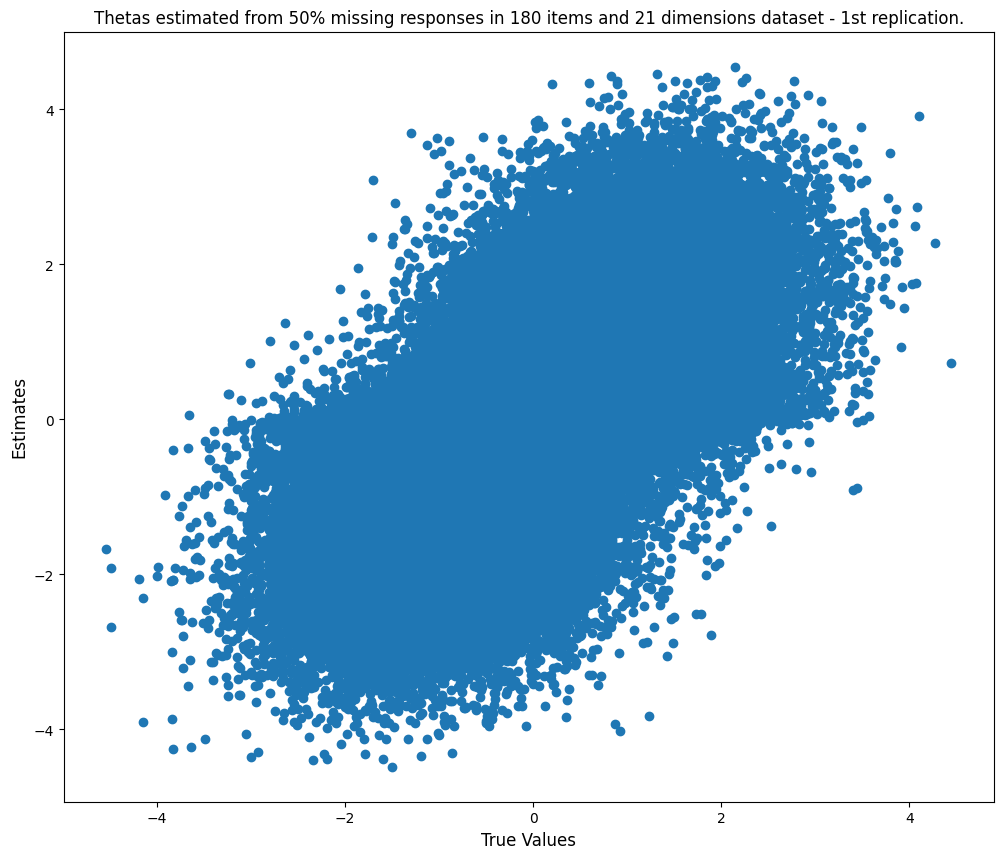

In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(x=theta_values.T, y=theta_results['Rep1'])
#plt.colorbar()
plt.xlabel('True Values', fontdict={'size': 12})
plt.ylabel('Estimates', fontdict={'size': 12})
plt.title('Thetas estimated from 50% missing responses in 180 items and 21 dimensions dataset - 1st replication.')
plt.show()

In [21]:
theta_results.to_csv('theta/theta_results.csv', sep=';', header=True, index=False)